## Import Necessary Modules

In [74]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras import layers

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
X = np.load("/content/drive/My Drive/DL/X.npy")
Y = np.load("/content/drive/My Drive/DL/Y.npy")
# y = pd.read_csv("/content/drive/My Drive/DL/Y.npy", sep = " ", header = None)

### Load the Dataset

In [77]:
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


Let's take a look at some of the examples

1855 - 2061: 5 = 206

1649 - 1854: 2

1443 - 1648: 3

1236 - 1442: 4

1028 - 1235: 8

822 - 1027: 1

615 - 821: 6

409 - 614: 7

204 - 408: 0

0 - 203: 9

(-0.5, 63.5, 63.5, -0.5)

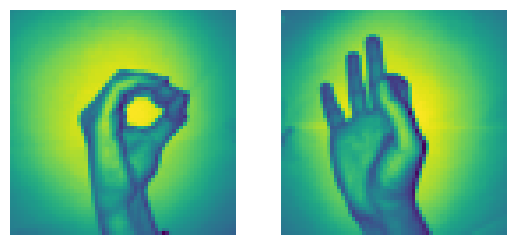

In [78]:
plt.subplot(1,2,1)
plt.imshow(X[205])
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(X[0])
plt.axis("off")

The first image to the left is zero while the one to the right is 9

In [79]:
print(Y[205])
print(Y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


You can see that it is not correctly labelled. Although if you examine the labels,  each image is incorrectly labelled in such a way that it is consistent.


For example:
Let's take a look at pictures that show the sign language for number 0 and 9 and look at their respective labels

#### The Number 0

(-0.5, 63.5, 63.5, -0.5)

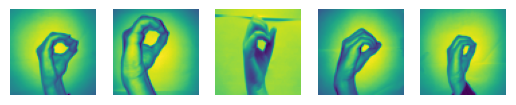

In [80]:
plt.subplot(1,5,1)
plt.imshow(X[205])
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X[204])
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X[206])
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X[210])
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(X[300])
plt.axis("off")

In [81]:
print(Y[205])
print(Y[204])
print(Y[206])
print(Y[210])
print(Y[300])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#### The Number 9

(-0.5, 63.5, 63.5, -0.5)

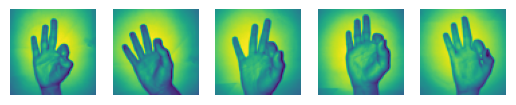

In [82]:
plt.subplot(1,5,1)
plt.imshow(X[200])
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X[190])
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X[100])
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X[90])
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(X[50])
plt.axis("off")

In [67]:
print(Y[200])
print(Y[190])
print(Y[100])
print(Y[90])
print(Y[50])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


As you can see, although they are mislabelled, they have a constant and uniform mislabel.

We will be using the dataset as it is

In [83]:
Y = np.array([np.argmax(i) for i in Y]) #Store the index of the highest number for each example
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
print(Y[205])
print(Y[204])
print(Y[206])
print(Y[210])
print(Y[300])

1
1
1
1
1


### Standardize the Dataset

In [85]:
X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

Because our dataset is already normalized, I will not be standardizing it

*How do you know that the data has already been normalized?*

In [86]:
print(X.min(), X.max())

0.003921569 1.0


The lowest value is close to 0 and the maximum value is 1.

Which means that the data was normalized to the range: 0 - 1

### Test/Train Split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

### Flatten the data

The image is a 64 by 64 pixel image. For the neurons to process it, the image needs to be flattened.


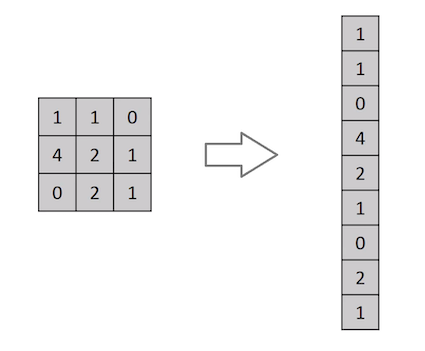

In [88]:
X_train = X_train.reshape(len(X_train), 64 * 64)
X_test = X_test.reshape(len(X_test), 64 * 64)

The picture on the left above represents a black and white image. It is a 3 by 3  pixel image. The flattened image is on the right. This is now a vector that the neural network can easily process. It has the dimensions 3 * 3 = 9

Now, because our image is a 64 by 64 pixel image. Our flattened image will be a vector with the dimensions 64 * 64 = 4096

### Build the Model

I will be using a very simple model: A single neural Network

In [104]:
model = keras.Sequential([
    layers.Dense(10, input_shape=(4096,), activation = "softmax")
])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### Training the Model

In [105]:
neural_network = model.fit(X_train, y_train, epochs= 50, validation_data = (X_test, y_test))

Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 2.7459 - accuracy: 0.1379 - val_loss: 2.4517 - val_accuracy: 0.1147
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 2.1879 - accuracy: 0.2308 - val_loss: 2.2143 - val_accuracy: 0.2827
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 1.9423 - accuracy: 0.3368 - val_loss: 2.2308 - val_accuracy: 0.2488
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 1.9294 - accuracy: 0.3728 - val_loss: 1.6598 - val_accuracy: 0.3780
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 1.5795 - accuracy: 0.5073 - val_loss: 1.5266 - val_accuracy: 0.4669
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 1.4783 - accuracy: 0.5211 - val_loss: 1.5212 - val_accuracy: 0.5202
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 1.3713 - accuracy: 0.5655 - val_loss: 1.4233 - val_accuracy: 0.5008
Epoch 8/50
46/46 [==

In [106]:
y_predicted = model.predict(X_test)
y_predicted[0]

20/20 [==============================] - 0s 1ms/step


array([1.7141182e-02, 1.9377455e-04, 2.5721687e-01, 5.3138179e-01,
       1.3706129e-04, 3.5598136e-03, 1.8993406e-01, 8.6728192e-05,
       3.0485846e-04, 4.3917054e-05], dtype=float32)

### Model Evaluation

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels = np.array(y_predicted_labels)

In [109]:
y_predicted_labels[:10]

array([3, 9, 3, 9, 0, 0, 7, 2, 0, 6])

<Axes: >

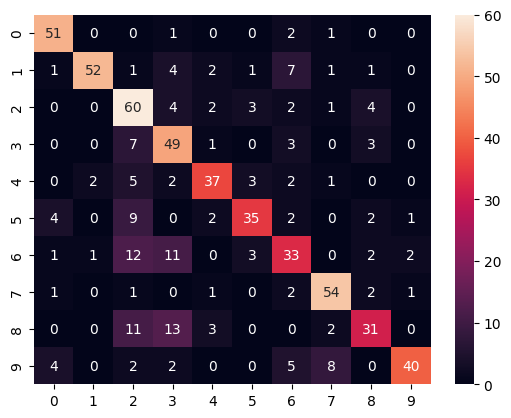

In [110]:
sns.heatmap(confusion_matrix(y_test, y_predicted_labels), annot = True)

In [111]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        55
           1       0.95      0.74      0.83        70
           2       0.56      0.79      0.65        76
           3       0.57      0.78      0.66        63
           4       0.77      0.71      0.74        52
           5       0.78      0.64      0.70        55
           6       0.57      0.51      0.54        65
           7       0.79      0.87      0.83        62
           8       0.69      0.52      0.59        60
           9       0.91      0.66      0.76        61

    accuracy                           0.71       619
   macro avg       0.74      0.71      0.72       619
weighted avg       0.74      0.71      0.71       619



The model has 71% accuracy.

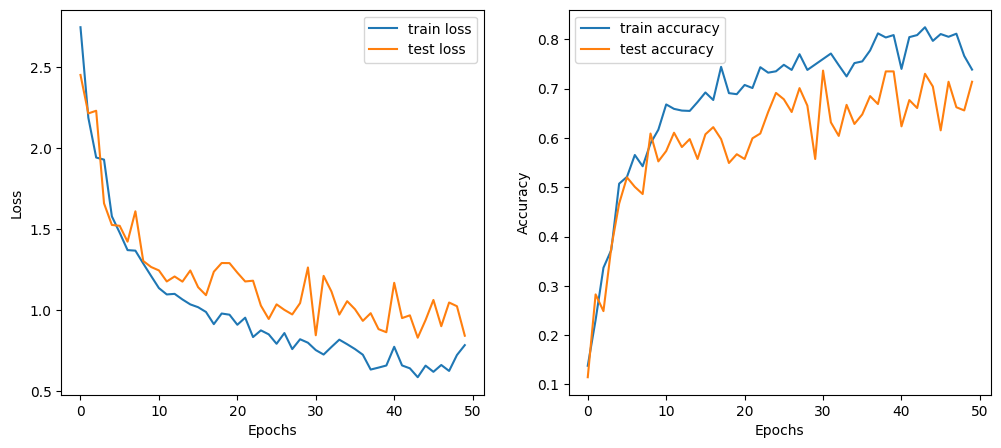

In [113]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(neural_network.history['loss'])
plt.plot(neural_network.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss'])

ax = plt.subplot(122)
plt.plot(neural_network.history['accuracy'])
plt.plot(neural_network.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy'])

Now that we've been able to build a simple model. Let's build a model from scratch

Resources:
https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7&t=420s